🎓 Capstone Project 1 — California Housing Prediction

1. Project Overview
1.1 Overview and Problem Statement

## Import the required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load Data

In [7]:
df = pd.read_csv('housing.csv')
print(df.head())
print(df.shape)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)


## 2. Data Preparation and Exploratory Data Analysis (EDA)

In [8]:
# 2. Data Preparation and Exploratory Data Analysis (EDA)

# Show the columns
print(df.columns)

# ocean_proximity is categorical variable
to_categorical = ['ocean_proximity']
df[to_categorical] = df[to_categorical].astype('category')

# housing_median_age and total_rooms are integer variables
to_integer = ['housing_median_age', 'total_rooms', 'households', 'population']
df[to_integer] = df[to_integer].astype('int64')

numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

print(df.info())
print(df.describe())


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(5), int64(4)
memory usage: 1.4 MB
None
          lon

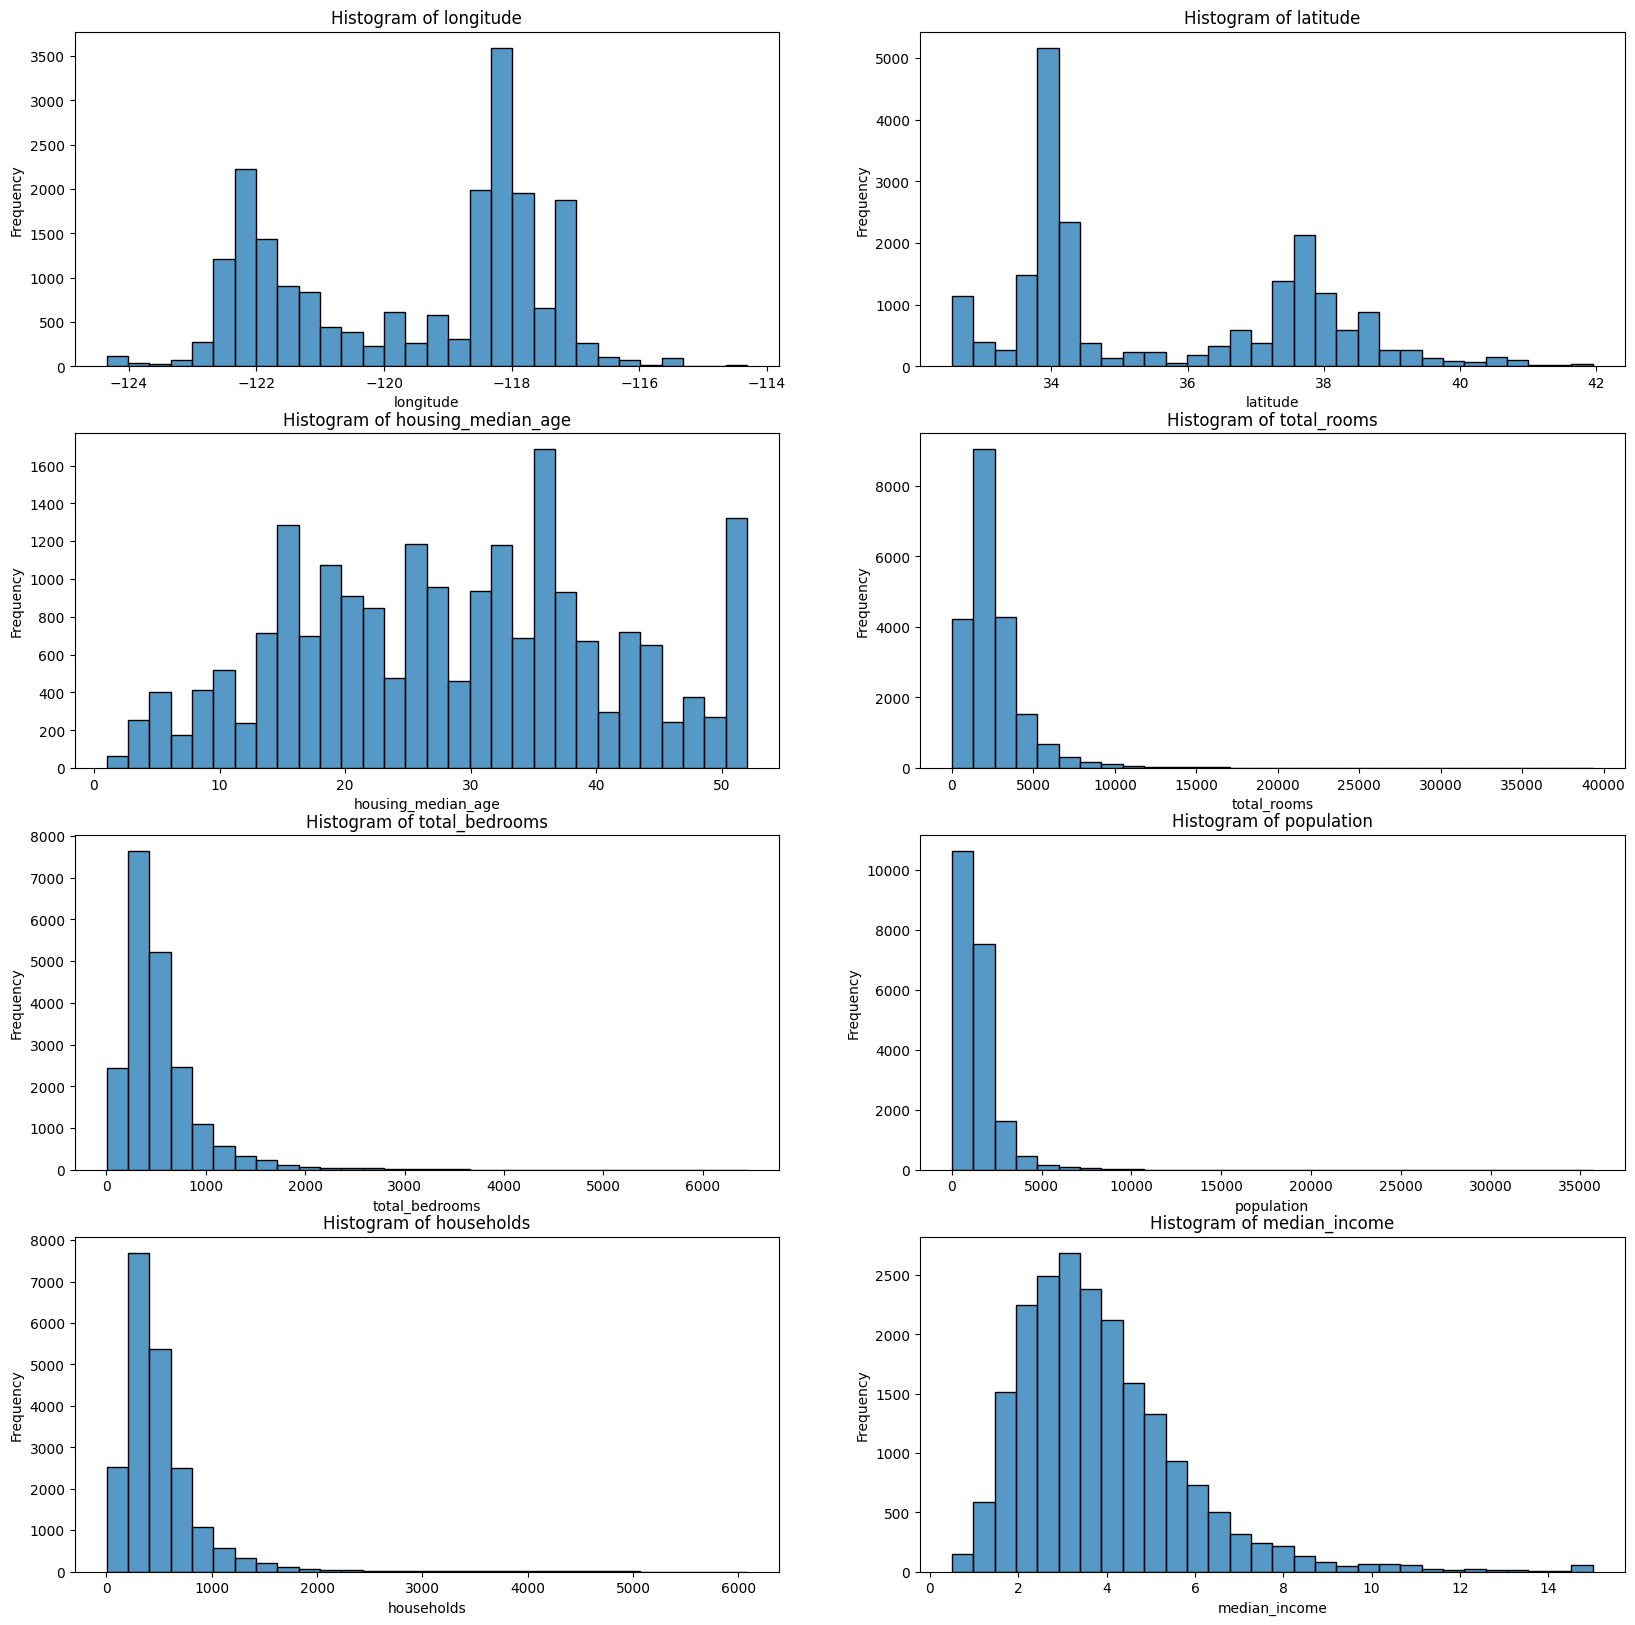

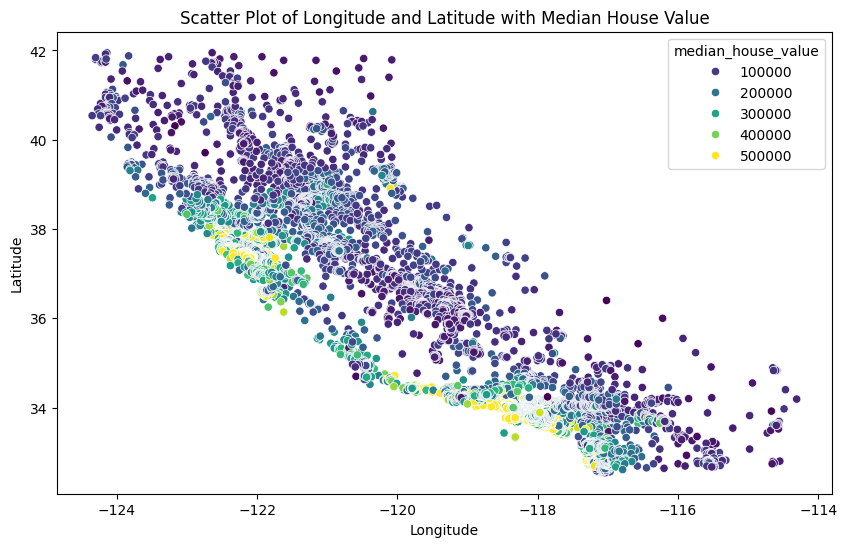

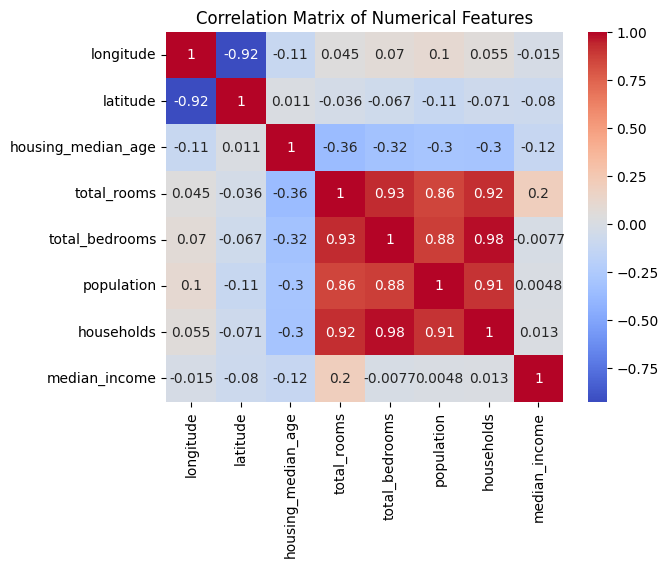

In [4]:
# plot the histogram of the numerical features (in 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], bins=30, kde=False, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# plot the scatter plot of longitude and latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='median_house_value', palette='viridis')
plt.title('Scatter Plot of Longitude and Latitude with Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# plot heatmap of the correlation matrix of the numerical features
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



# 3. Data Preprocessing

In [14]:
# Split the data into training and testing sets
df_all_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_all_train, test_size=0.25, random_state=42)

y_train = df_train.median_house_value.values
y_all_train = df_all_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

df_train = df_train.drop('median_house_value', axis=1)
df_all_train = df_all_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

all_train_dict = df_all_train.to_dict(orient='records')
X_all_train = dv.transform(all_train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

print(dv.get_feature_names_out())


['households' 'housing_median_age' 'latitude' 'longitude' 'median_income'
 'ocean_proximity=<1H OCEAN' 'ocean_proximity=INLAND'
 'ocean_proximity=ISLAND' 'ocean_proximity=NEAR BAY'
 'ocean_proximity=NEAR OCEAN' 'population' 'total_bedrooms' 'total_rooms']


## 4. Model Training and Evaluation

In [ ]:
# 4. Model Training and Evaluation

# Train the model with Linear Regression (Baseline Model) 
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_predictions))
print(f"Baseline Model has RMSE: {baseline_rmse}")

# Train the model with Lasso Regression with hyperparameters tuning
lasso_alpha = [0.001, 0.01, 0.1, 1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50, 60, 70, 80, 90, 100, 1000]
lasso_rmse = []
for alpha in lasso_alpha:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_val)
    lasso_rmse.append(np.sqrt(mean_squared_error(y_val, lasso_predictions)))
    print(f"Lasso Model with alpha={alpha} has RMSE: {lasso_rmse[-1]}")

# Train the model with Ridge Regression with hyperparameters tuning
ridge_alpha = [0.001, 0.01, 0.1, 1, 10, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 100, 1000]
ridge_rmse = []
for alpha in ridge_alpha:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_val)
    ridge_rmse.append(np.sqrt(mean_squared_error(y_val, ridge_predictions)))
    print(f"Ridge Model with alpha={alpha} has RMSE: {ridge_rmse[-1]}")

# Best parameters
best_lasso_alpha = lasso_alpha[np.argmin(lasso_rmse)]
best_ridge_alpha = ridge_alpha[np.argmin(ridge_rmse)]
print(f"Best Lasso Alpha: {best_lasso_alpha}")
print(f"Best Ridge Alpha: {best_ridge_alpha}")



Baseline Model has RMSE: 68581.5649264656


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4732982428766.105, tolerance: 16403916582.47172
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Model with alpha=0.001 has RMSE: 68645.27135501952


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4733000553845.16, tolerance: 16403916582.47172
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Model with alpha=0.01 has RMSE: 68645.21246684351


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4733186474181.883, tolerance: 16403916582.47172
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Model with alpha=0.1 has RMSE: 68644.62479011659


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4734729322128.719, tolerance: 16403916582.47172
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Model with alpha=1 has RMSE: 68638.86853753742
Lasso Model with alpha=10 has RMSE: 68592.53922456845
Lasso Model with alpha=20 has RMSE: 68566.9140378001
Lasso Model with alpha=21 has RMSE: 68565.84420676903
Lasso Model with alpha=22 has RMSE: 68565.04585244405
Lasso Model with alpha=23 has RMSE: 68564.51898316413
Lasso Model with alpha=24 has RMSE: 68564.26360350929
Lasso Model with alpha=25 has RMSE: 68564.27971397669
Lasso Model with alpha=26 has RMSE: 68564.5673074803
Lasso Model with alpha=27 has RMSE: 68565.12636015957
Lasso Model with alpha=28 has RMSE: 68565.95566391919
Lasso Model with alpha=29 has RMSE: 68567.05834348024
Lasso Model with alpha=30 has RMSE: 68568.43224547454
Lasso Model with alpha=40 has RMSE: 68576.20116099394
Lasso Model with alpha=50 has RMSE: 68575.44180810306
Lasso Model with alpha=60 has RMSE: 68574.72947234468
Lasso Model with alpha=70 has RMSE: 68574.06416770382
Lasso Model with alpha=80 has RMSE: 68573.44590129731
Lasso Model with alpha=90 has R

/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Train the model with Neural Network (Keras)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)
nn_predictions = model.predict(X_test)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
print(f"Neural Network Model has RMSE: {nn_rmse}")


Epoch 1/20


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49156681728.0000 - root_mean_squared_error: 221119.1562 - val_loss: 27135901696.0000 - val_root_mean_squared_error: 164729.7812
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 25192622080.0000 - root_mean_squared_error: 158656.2344 - val_loss: 26265380864.0000 - val_root_mean_squared_error: 162065.9844
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 24722688000.0000 - root_mean_squared_error: 157174.6094 - val_loss: 24984563712.0000 - val_root_mean_squared_error: 158065.0625
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 23403970560.0000 - root_mean_squared_error: 152953.2656 - val_loss: 23088611328.0000 - val_root_mean_squared_error: 151949.3750
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 22625611776.0000 - root_mean_squared_error: 150341.8125 - val_loss: 20451065856.0000 - val_root_mean_squared_error: 143007.2188
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 1

ValueError: Input contains NaN.

## Visualize the Results

Text(0, 0.5, 'Predicted Values')

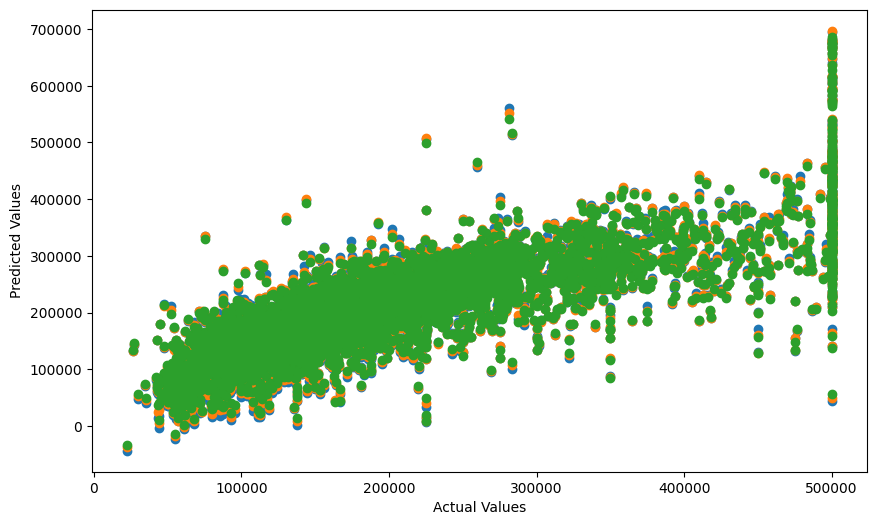

In [ ]:
# Plot the predictions of each of the above models
plt.figure(figsize=(10, 6))
plt.scatter(y_val, baseline_predictions, label='Baseline Model')
plt.scatter(y_val, lasso_predictions, label='Lasso Model')
plt.scatter(y_val, ridge_predictions, label='Ridge Model')
plt.scatter(y_val, nn_predictions, label='Neural Network Model')
plt.plot(y_val, y_val, color='black', linestyle='--', label='x = y')
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Test the models with the test set
baseline_predictions_test = baseline_model.predict(X_test)
lasso_predictions_test = lasso_model.predict(X_test)
ridge_predictions_test = ridge_model.predict(X_test)

# Calculate the MSE of the test set
baseline_mse_test = mean_squared_error(y_test, baseline_predictions_test)
lasso_mse_test = mean_squared_error(y_test, lasso_predictions_test)
ridge_mse_test = mean_squared_error(y_test, ridge_predictions_test)

print(f"Baseline Model has MSE: {baseline_mse_test}")
print(f"Lasso Model has MSE: {lasso_mse_test}")
print(f"Ridge Model has MSE: {ridge_mse_test}")

## Model Export and Scripting

In [ ]:
# Use pickle to export the models
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)